In [11]:
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import torch

from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [9]:
if torch.cuda.is_available():
    print("Currently using GPU:",torch.cuda.current_device())

Currently using GPU: 0


In [10]:
clf = pipeline("sentiment-analysis","distilbert-base-uncased-finetuned-sst-2-english",device=0)

<Axes: >

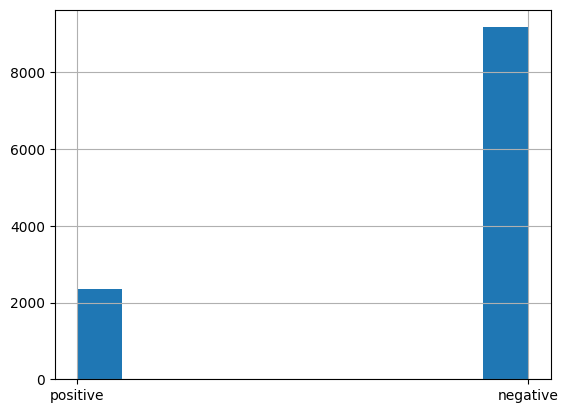

In [30]:
df = pd.read_csv("AirlineTweets.csv")[["airline_sentiment","text"]]
df = df.loc[df['airline_sentiment'] != 'neutral']
df['airline_sentiment'].hist()

In [31]:
mapping = {'negative': 0, 'positive': 1}
df["target"] = df["airline_sentiment"].map(mapping)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [32]:
texts = df['text'].tolist()

In [33]:
preds = clf(texts)

In [35]:
preds[:5]

[{'label': 'POSITIVE', 'score': 0.6070835590362549},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553214311599731}]

In [37]:
new_preds = []
for pred in preds:
    if pred['label'] == 'NEGATIVE':
        pred['score'] = 1 - pred['score']
        new_preds.append(pred)
    else:
        new_preds.append(pred)


In [50]:
results = pd.DataFrame(new_preds)
results['label'] = results['label'].apply(lambda x: 0 if x == 'NEGATIVE' else 1)
results = results.join(df.reset_index()['target'])

In [53]:
y_true = results['target']
y_pred = results['label']

print(confusion_matrix(y_true, y_pred))

[[8271  907]
 [ 364 1999]]


In [56]:
roc_auc_score(y_true, y_pred)

0.8735676271257872